# Introduction:

## Background:

Let's assume that we're working for an an e-learning company that offers courses on programming. 

**Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement.** 

## Goal: 

Our goal in this project is to find out the two best markets to advertise our product in.

## Process:

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. 

freeCodeCamp is a free e-learning platform that offers courses on web development. 

Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

# Part 1: Intial Data Exploration

In [1]:
#import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in the data
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              float64
AttendedBootcamp                 float64
BootcampFinish                   float64
BootcampLoanYesNo                float64
BootcampName                     object
BootcampRecommend                float64
ChildrenNumber                   float64
CityPopulation                   object
CodeEventConferences             float64
CodeEventDjangoGirls             float64
CodeEventFCC                     float64
CodeEventGameJam                 float64
CodeEventGirlDev                 float64
CodeEventHackathons              float64
CodeEventMeetup                  float64
CodeEventNodeSchool              float64
CodeEventNone                    float64
CodeEventOther                   object
CodeEventRailsBridge             float64
CodeEventRailsGirls              float64
CodeEventStartUpWknd             float64
CodeEventWkdBootcamps           

Columns that seem relevant to our analysis are:

- Age
- AttendedBootcamp
- CountryCitizen
- CountryLive
- EmploymentField
- Gender
- HasChildren
- Income
- JobRoleInterest

To be able to create cohorts of users by their demographic information and job interests to see which markerts have the best likelihood of ROAS.

This dataset comes from a survey asking people who are new to coding or interested in coding about their interests and demographic questions. Using this dataset would be much cheaper than traditional market research, less cumborsome to do, and can contain just as valuable insights. 

Data can be downloaded here: [2017-new-coder-survey](https://github.com/freeCodeCamp/2017-new-coder-survey).

# Part 2: Is the data representative?

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. 

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. 

We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

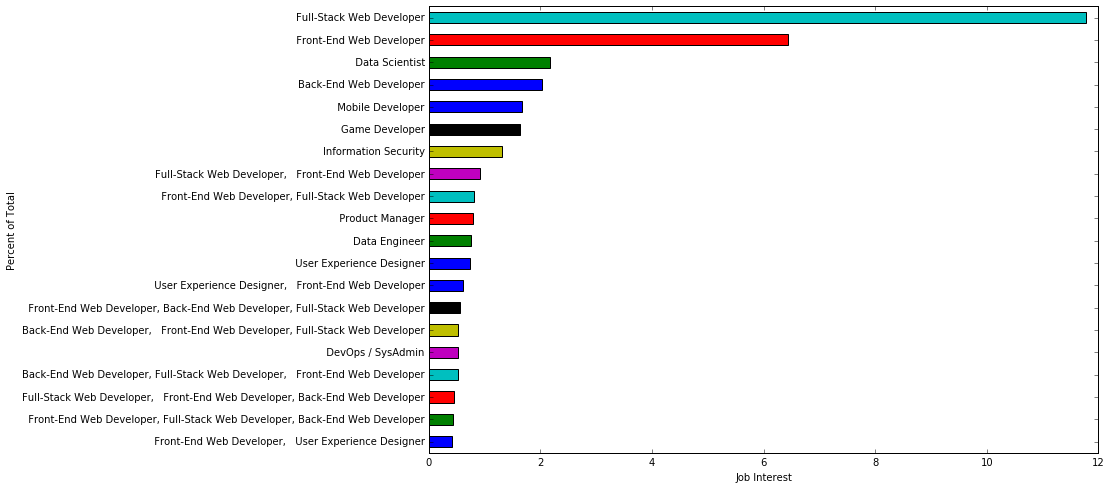

In [4]:
%matplotlib inline
jobinterest = df['JobRoleInterest'].value_counts(normalize=True)*100
jobinterest.head(20).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Job Interest')
plt.ylabel('Percent of Total')
plt.figure(figsize=(20,20))

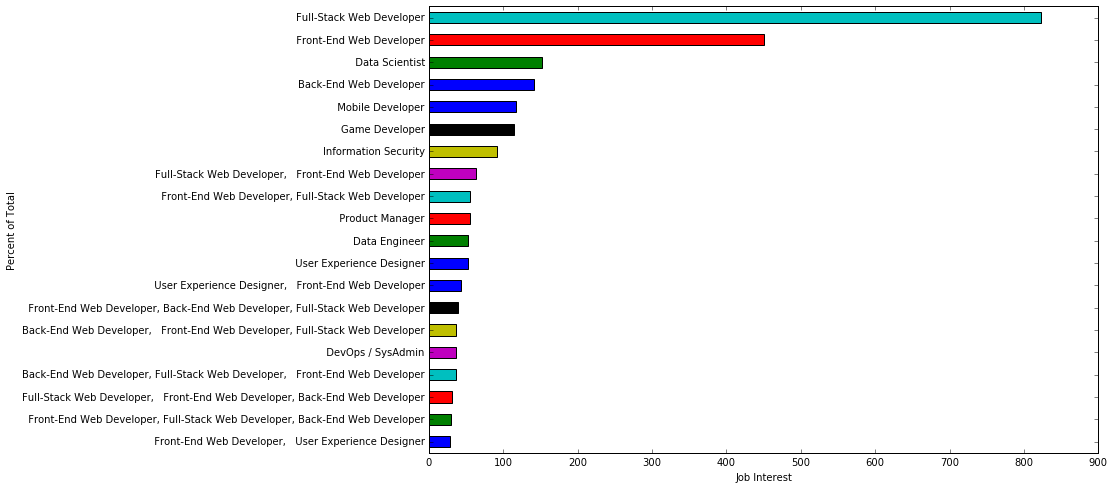

In [5]:
jobinterest_values =  df['JobRoleInterest'].value_counts()
jobinterest_values.head(20).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Job Interest')
plt.ylabel('Percent of Total')
plt.figure(figsize=(20,20))

From the horizontal bar charts above, a good amount people are interested in becoming some type of Web Developer. Web developer seems be the most sought after position. 

We can also note there are many combinations of people who want to learn web development with a combination of other positions. 

The sample is representative because it contains majority individuals are mainly interested in web development and smaller percentage of users interested in mobile development. 

From the graphs above, we know around 800 people are interested in Full-Stack Web Development and about 150 people are interested in Mobile Development.

# Part 3: Gathering Demographic Understanding of sample

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

## Goal: 

Finding the two best countries to advertise in.

(One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. 

If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.)

**----------------------------------------------------------------------**
To make sure we have a representative sample, lets drop all the rows where participants didnt answer what role they are interested in.
**----------------------------------------------------------------------**

In [6]:
sample = df[df['JobRoleInterest'].notnull()]

In [7]:
sample['JobRoleInterest'].notnull().sum()

6992

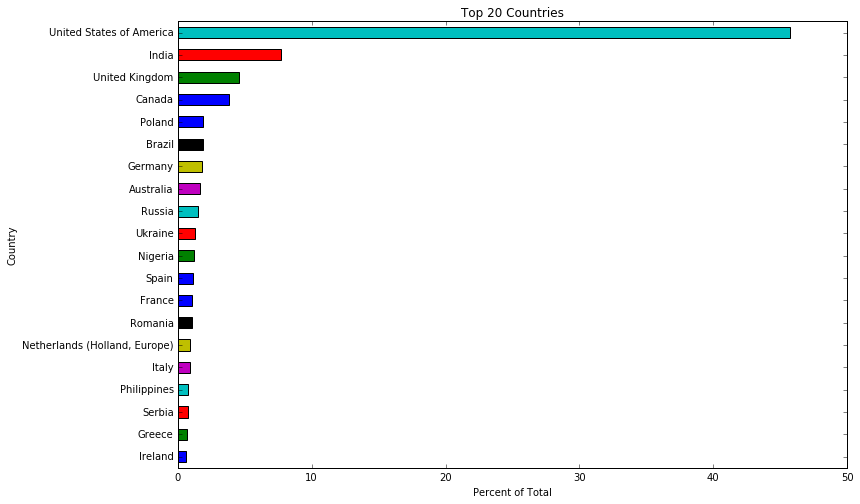

In [8]:
%matplotlib inline
rel_freq_country= sample['CountryLive'].value_counts(normalize=True)*100
rel_freq_country.head(20).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Percent of Total')
plt.ylabel('Country')
plt.title('Top 20 Countries')

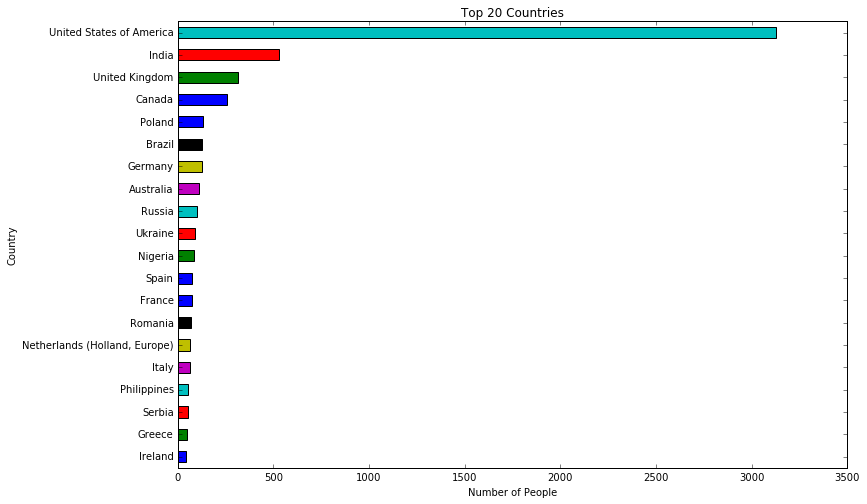

In [9]:
%matplotlib inline
abs_freq_country= sample['CountryLive'].value_counts()
abs_freq_country.head(20).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Number of People')
plt.ylabel('Country')
plt.title('Top 20 Countries')

Based on the data and graphs above, overwhelmingly the top two countries arae going to be United States of America (almost half) and India, these would be the top two companies to advertise in based on this so far.

However, for our analysis we need go much more in depth. These insights are just at a vague high level, we don't know how exactly if these areas are meaningful, at a high level they seem targetable but are these individuals likely to procure our services, are they even likely to spend money on our services.

**We need to go more in depth with our analysis before taking a decision.We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.**

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. 

**Our company sells subscriptions at a price of $59 per month**, and for this reason we're interested in finding out how much money each student spends per month.

Lets narrow down our analysis: the US, India, the United Kingdom, and Canada. 

Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample and our courses are written in English, and English is an official language in all these four countries.

In [10]:
# Create a new column that describes the amount of money 
# a student has spent per month (at the moment they completed the survey)
# Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). 
# To avoid dividing by 0, replace all the values of 0 with 1.

newsample = sample.copy()
newsample['MonthsProgramming'] = newsample['MonthsProgramming'].replace(0,1)
newsample['MoneySpentforLearningPerMonth'] = newsample['MoneyForLearning']/newsample['MonthsProgramming']

In [11]:
#how many values in the new column are NaN
newsample['MoneySpentforLearningPerMonth'].isnull().sum()

675

In [12]:
#removing null value columsn for 'MoneySpentforLearningPerMonth' and 'CountryLive'
refinedsample = newsample[(newsample['MoneySpentforLearningPerMonth'].notnull()) & (newsample['CountryLive'].notnull())]

In [13]:
print(refinedsample['MoneySpentforLearningPerMonth'].isnull().sum())
print(refinedsample['CountryLive'].isnull().sum())

0
0


Now that we have cleaned the data, lets group the remaining data sample by `CountryLive` and find out on average how much money a studen spends on learning in the US, India, UK, and Canada.

In [14]:
AvgmoneyspntbyCounty = refinedsample.groupby(['CountryLive'])['MoneySpentforLearningPerMonth'].mean().round(2).sort_values(ascending=False)
AvgmoneyspntbyCounty[['United States of America','India','United Kingdom','Canada']].sort_index()

CountryLive
Canada                      113.51
India                       135.10
United Kingdom               45.53
United States of America    228.00
Name: MoneySpentforLearningPerMonth, dtype: float64

# Part 3: Removing Outliers

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



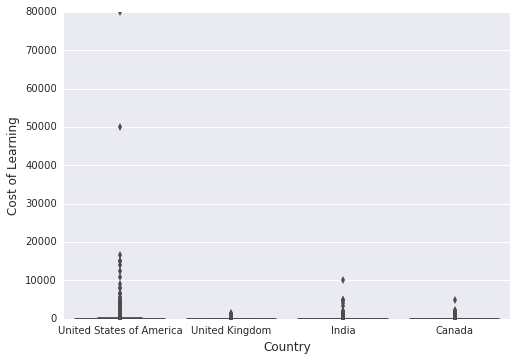

In [15]:
fourcountries = refinedsample[refinedsample['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
# sns.set_theme(style=whitegrid")
# kwargs = {'xlabel':'Country','ylabel':'Money Spent per Month'}
g = sns.boxplot(x='CountryLive',y='MoneySpentforLearningPerMonth',data=fourcountries)
g.set_xlabel("Country", fontsize = 12)
g.set_ylabel("Cost of Learning", fontsize = 12)

Most values are within a range of 20,000 or less. Lets filter our data for values less than that. Then we can investigate further and try to understand the outliers a bit more.

In [16]:
fourcountries_rmv_outlier = fourcountries[fourcountries['MoneySpentforLearningPerMonth'] < 20000]
meanafteroutlierremoval = fourcountries_rmv_outlier.groupby(['CountryLive'])['MoneySpentforLearningPerMonth'].mean().round(2).sort_values(ascending=False)
meanafteroutlierremoval[['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    183.80
India                       135.10
United Kingdom               45.53
Canada                      113.51
Name: MoneySpentforLearningPerMonth, dtype: float64

The average looks better now, but still a little off. 

For example, its a big difference between the amount people spend in the UK versus America still, and the mean value for India still seems very expensive. 

Lets investigate further.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



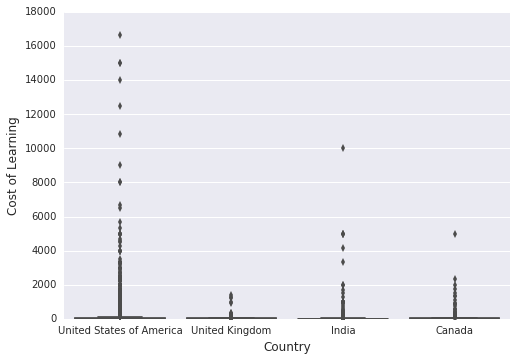

In [17]:
m = sns.boxplot(x='CountryLive',
                y='MoneySpentforLearningPerMonth',
                data=fourcountries_rmv_outlier)
m.set_xlabel("Country", fontsize = 12)
m.set_ylabel("Cost of Learning", fontsize = 12)

Multiple values above 6,000 for the United States which is very expensive for education a month. Considering post secondary school, many people cannot afford 6,000+ a month for schooling, maybe they attended very prestigious bootcamps or whatnot, lets take a look, also for India and Canada as well.

In [18]:
fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='United States of America') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>=6000),:]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentforLearningPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


A couple people from the United States attended bootcamps, im not sure how expensive these bootcamps usually are but it would suggest that people do spend a pretty penny on them. From this example it is okay to keep the data points where users attended camps , but get rid of the others.

In [19]:
fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='India') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>2000),:]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentforLearningPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Looking at the individual data for outliers in India, these people did not attend a bootcamp or post-secondary education that could validate these monthly costs. For now, we can eliminate them because I dont see a plausible reason for this. 

In [20]:
fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='Canada') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>=4000),:]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentforLearningPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This individual attended a bootcamp for Bloc.io, and from a quick google search about this bootcamp, "the Bloc bootcamps cost between $9,500 and $16,000, but there are a few payment options to help you cover this Bloc price." This is very expensive, and the candidate was not coding for a long time, so this individual is worth removing.

In [24]:
us_outliers = fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='United States of America') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>=6000) &
    (fourcountries_rmv_outlier['AttendedBootcamp'] == 0),:]

us_less_than_3_months = fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive'] == 'United States of America') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth'] >= 6000) &
    (fourcountries_rmv_outlier['MonthsProgramming'] <= 3)]

india_outliers = fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='India') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>2000),:]

canada_outliers = fourcountries_rmv_outlier.loc[
    (fourcountries_rmv_outlier['CountryLive']=='Canada') & 
    (fourcountries_rmv_outlier['MoneySpentforLearningPerMonth']>4000),:]

fourcountries_rmv_outlier = fourcountries_rmv_outlier.drop(us_outliers.index)
fourcountries_rmv_outlier = fourcountries_rmv_outlier.drop(us_less_than_3_months.index)
fourcountries_rmv_outlier = fourcountries_rmv_outlier.drop(india_outliers.index)
fourcountries_rmv_outlier = fourcountries_rmv_outlier.drop(canada_outliers.index)

Now that we have cleaned the outliers lets take another look at the average mean of cost of learning per month and see which countries would be best to advertise in now:

In [25]:
ms = fourcountries_rmv_outlier.groupby(['CountryLive'])['MoneySpentforLearningPerMonth'].mean().round(2).sort_values(ascending=False)
ms

CountryLive
United States of America    142.65
Canada                       93.07
India                        65.76
United Kingdom               45.53
Name: MoneySpentforLearningPerMonth, dtype: float64

In [32]:
# lets create a dict of the number of users per country
survey_takers_by_country ={}
countries = ['United States of America','Canada','India','United Kingdom']

for c in countries:
    rowcount = (fourcountries_rmv_outlier[fourcountries_rmv_outlier['CountryLive']==c].shape[0])
    survey_takers_by_country[c] =rowcount
survey_takers_by_country

{'Canada': 239,
 'India': 457,
 'United Kingdom': 279,
 'United States of America': 2920}

Interesting to note now, how much on average people spend in the main four countries after outliers have been removed. The United States of America and Canada are by far two the best markets to advertise in.

# Part 4: Analysis & Suggestion:

Now that we have conducted ETL, data visualization, and some standard stats we know now that the United States and Canada are the two best markets to advertise in. However, lets take some considerations into thought and add some context that could possibly help our marketing or advertising team maximiize their ROAS.

Lets consider:
 - Our subscription cost is $59 per month
 - There are 2920 people in our survey for the United States, and 239 for Canada.
 
Based on these results it would be wiser to advertise only in the American market, due to the fact there are more potential customers to market too and that the American segment audience has a higher price point they spend per month. American audiences will see the $59 price point as much cheaper and will be easier to convince of the cost. 